## Image Downloader using Python

This notebook downloads all the Technical Drawing from the webpage: https://www.heisig.com/aktuelle-auftraege/drehen and stores them locally into your current directory.

### Short Summary of the code
In this code, following libraries are used for purposes described below:
1. requests: reach out the server with requests and get back the desired information
2. bs4: parsing html documents and pages, useful for web scrapping
3. os: create and change directories

The procedure used to find out images on the given link is that: 
*   First we inspect the given link and extract all the html tags containing the images.
*   We see that the link given on inspection of images has relative address and not full address, so we convert them into full address path. 
*   After that, we store those images into a new folder with their respective image names(also extracted from the html code).

In [1]:
# Importing all the required libraries
import requests
from bs4 import BeautifulSoup
import os

In [2]:
# Define a function to create a new folder and change the directory to created folder
def create_folder(folder_name):
  
  # Error handling: if the directory creation fails then the program will not terminate, but catch 'pass' in except condition
  try:
    os.mkdir(os.path.join(os.getcwd(), folder_name)) #creating new directory by joining current directory & new folder
  except:
    pass
  os.chdir(os.path.join(os.getcwd(), folder_name)) #changing the directory 

In the following image we can see that images are actually downloaded by clicking on the buttons on the webpage, so we need to check the < a > tag to get the image link.The href (red box) contains the relative address, so we need to append the original website address with it to make it downloadable.

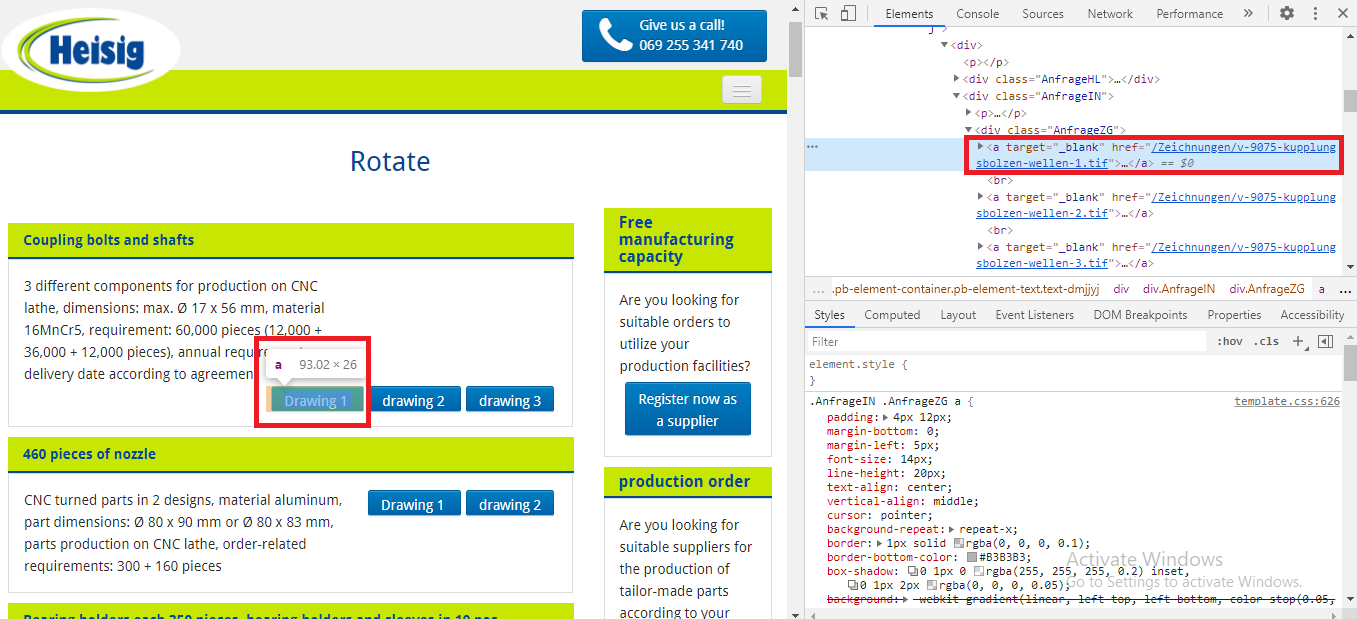

In [3]:
# Define a function to extract all the images and save their links into a list
def extract_images(soup):

  # Intiaize an empty list which stores all the image links
  L= []

  for img in soup.find_all('a'): #loop over all the <a> tags in the given webpage using HTML parser(soup.find_all)
    link = img.get('href') #extract the href part of html <a> tag
    target = img.get('target') #extract the target part of html <a> tag

    if link and target=='_blank': #if href part is not empty and target is _blank, then we have desired image links
      image_link = "https://heisig.com" + link #since image is given in relative addressing, we manually concatenate the image url with the original webaddress
      L.append(image_link) #append the image link to the list L

  return L #return the concatenated list L containing image links 

In [4]:
# Define a function to use the extracted image links and save them with appropriate names into a folder
def saving_images_into_folder(list_of_image_links):

  # Iterate over all image links stored in the list
  for image_link in list_of_image_links:

    filename = image_link.split("/")[-1] #extract the file name, ie. name of image from the link
    
    with open(filename.replace(' ','-').replace('/',''), 'wb') as f: #open file
      im = requests.get(image_link) #requesting server to give back information about the image link
      f.write(im.content) #writing back to the file
      print('Saving:',filename) #printing the images that have been saved

In [5]:
# Define a function to download all the images from webpage and store them locally
def image_downloader(url, folder_name):

  # Step 1: Create a new folder to save all the images in it
  create_folder(folder_name) #calling create_folder() function

  r = requests.get(url) #requesting server to give back information about url
  soup = BeautifulSoup(r.text, 'html.parser') #creating a html parser using BeautifulSoup

  # Step 2: Extract all the images from website and save the links of images into a list
  list_of_image_links = extract_images(soup) #calling extract_images() function

  # Step 3: From the extracted links save them into a folder locally
  saving_images_into_folder(list_of_image_links) #calling saving_images_into_folder() function

In [6]:
web_url = "https://www.heisig.com/aktuelle-auftraege/drehen" #Specify the url of the webpage from which the images are to be extracted
folder_name = 'Drehen Images' #Specify a folder name where you want the images to be downloaded

# Call the main function by passing the url of the webpage and the new folder name and printing the images saved
image_downloader(web_url, folder_name)

Saving: zeichnung_einsatz_kugelzentrierung_.tiff
Saving: zeichnung_kugeleinsatz_.tiff
Saving: zeichnung_kugelzentrierung.tiff
Saving: zeichnung_kupplung_bm7886.tiff
Saving: fuer_homepage-achse_bm7843.tif
Saving: v-9118-keilriemenscheiben-1.tif
Saving: v-9118-keilriemenscheiben-2.tif
Saving: v-9118-keilriemenscheiben-3.tif
Saving: zeichnung_welle_bm7886.tiff
Saving: v-9114-antriebswellen-1.tif
Saving: v-9114-antriebswellen-2.tif
Saving: v-9113-bolzen-1.tif
Saving: v-9113-bolzen-2.tif
Saving: v-9113-bolzen-3.tif
Saving: zeichnung_kolben.tiff
Saving: v-9126-lagerhuelsen-ringe-endanschlag-zugrohr-1.tif
Saving: v-9126-lagerhuelsen-ringe-endanschlag-zugrohr-2.tif
Saving: v-9126-lagerhuelsen-ringe-endanschlag-zugrohr-3.tif
Saving: zeichnung_kurbelwelle_bm7844.tiff
Saving: v-9111-radbolzen.tif
Saving: v-6460-hydraulikkomponenten-1.tif
Saving: v-6460-hydraulikkomponente-2.tif
Saving: v-6460-hydraulikkomponente-3.tif
Saving: zeichnung_gehaeuse.tiff
Saving: v-6403-wellen-1.tif
Saving: v-6403-well

### **Output:**
A new folder named 'Drehen Images' is created in current directory as seen below:


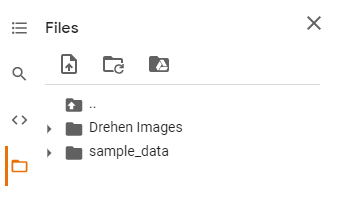


All the images are stored in the new folder as seen below:

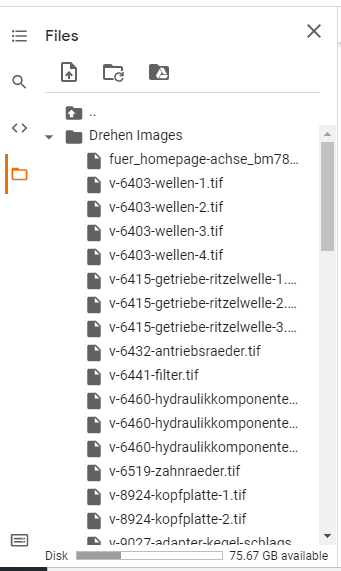